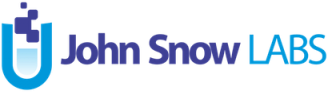

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlptest/blob/main/demo/tutorials/HuggingFaceHub_QA_Testing_Notebook.ipynb)

**nlptest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy, OpenAI, AI21 or Cohere** models, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification and Question Answering (QA) model using the library. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with nlptest on John Snow Labs

In [ ]:
!pip install nlptest

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the nlptest library in the following way.

In [ ]:
#Import Harness from the nlptest library
from nlptest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (text-classification or ner)|
|**model**     |PipelineModel or path to a saved model or pretrained pipeline/model from hub.
|**data**       |Path to the data that is to be used for evaluation. Can be .csv or .conll file in the CoNLL format 
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.
|**hub**       |model hub to load from the path. Required if model param is passed as path.|

<br/>
<br/>

# Model Testing from HuggingFace Hub For Question Answering

In this section, we dive into testing of HuggingFace Hub models in Question Answering task.

nlptest supports robustness tests for LLM testing for now.

### Set environment for HuggingFace Hub

In [ ]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "<API_TOKEN>"


## BoolQ-test-tiny dataset testing

### Setup and Configure Harness

In [ ]:
harness = Harness(task="question-answering", hub="huggingface-inference-api", model="google/flan-t5-small", data='BoolQ-test-tiny')

We have specified task as QA, hub as Cohere and model as `google/flan-t5-small`, `google/flan-t5-xl`, `stabilityai/stablelm-tuned-alpha-3b`, or `databricks/dolly-v2-3b`.

For dataset we used BoolQ-test-tiny which includes 50 lines from BoolQ-test. Other available datasets are:

* `BoolQ-test-tiny`
* `BoolQ-test`
* `BoolQ-combined`
* `NQ-open-test`
* `NQ-open-combined`
* `NQ-open-test-tiny`



For tests we used lowercase and uppercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`

Available Bias tests for QA task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_length:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure({
    'model_parameters': {
        'temperature': 0,
        'max_length': 64
    },
    
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.


### Generating the test cases.

In [ ]:
harness.generate()

harness.generate() method automatically generates the test cases (based on the provided configuration)

In [ ]:
harness.testcases()

harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [ ]:
harness.run()

Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [ ]:
harness.generated_results()

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

#### NQ-open-test dataset testing

We can also use another dataset, NQ-open for testing the model.

In [ ]:
harness = Harness(task="question-answering", hub="huggingface-inference-api", model="google/flan-t5-small", data='NQ-open-test-tiny')

In [ ]:
harness.configure({
    'model_parameters': {
      'max_length': 512
    },
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

In [ ]:
harness.generate()

In [ ]:
harness.testcases()

In [ ]:
harness.run()

In [ ]:
harness.generated_results()

In [ ]:
harness.report()